In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [2]:
results = pd.read_csv(path.join(DATA_DIR, 'results_ticks.csv'),
                      names=['Tick_length','Count_type']+list(range(7000)))
results.set_index(list(results.columns[:2]), inplace=True)

In [3]:
results.head()

0             1             2     \
Tick_length Count_type                                             
0           S           1.526206e+07  2.332669e+07  1.370947e+07   
            I           1.594136e+04  1.589169e+04  8.747918e+03   
            R           1.538938e+03  2.778338e+04 -1.606672e+04   
1           S           7.947054e+06  7.947054e+06  7.947054e+06   
            I           1.000000e+00  1.006944e+00  1.013935e+00   

                                3             4             5     \
Tick_length Count_type                                             
0           S           2.713313e+06  1.017553e+07  1.478347e+07   
            I           6.716291e+03  7.162418e+03  2.948738e+04   
            R          -2.196050e+04 -1.259438e+05  9.531646e+03   
1           S           7.947054e+06  7.947054e+06  7.947054e+06   
            I           1.020976e+00  1.028065e+00  1.035203e+00   

                                6             7             8     \
Tick_length Count_type                                             
0           S           4.342852e+07  6.238789e+07  4.248648e+07   
            I           1.490585e+05  1.665383e+05  1.023003e+05   
            R           1.103835e+05  2.184623e+05 -3.396706e+05   
1           S           7.947054e+06  7.947054e+06  7.947054e+06   
            I           1.042391e+00  1.049629e+00  1.056917e+00   

                                9     ...   6990  6991  6992  6993  6994  \
Tick_length Count_type                ...                                  
0           S           5.583958e+06  ...    NaN   NaN   NaN   NaN   NaN   
            I           9.171767e+03  ...    NaN   NaN   NaN   NaN   NaN   
            R          -1.848836e+04  ...    NaN   NaN   NaN   NaN   NaN   
1           S           7.947054e+06  ...    NaN   NaN   NaN   NaN   NaN   
            I           1.064255e+00  ...    NaN   NaN   NaN   NaN   NaN   

                        6995  6996  6997  6998  6999  
Tick_length Count_type                                
0           S            NaN   NaN   NaN   NaN   NaN  
            I            NaN   NaN   NaN   NaN   NaN  
            R            NaN   NaN   NaN   NaN   NaN  
1           S            NaN   NaN   NaN   NaN   NaN  
            I            NaN   NaN   NaN   NaN   NaN  

[5 rows x 7000 columns]

In [4]:
results.drop(index=0, inplace=True)

In [5]:
I_cols = results.xs('I', level='Count_type').T
R_cols = results.xs('R', level='Count_type').T

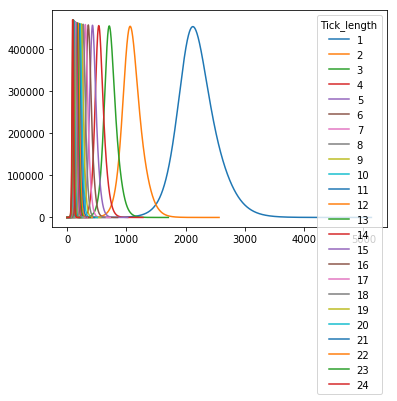

In [6]:
I_cols.plot()

In [7]:
peaks = pd.concat([I_cols.idxmax(), I_cols.T.max(), R_cols.max()], axis=1)
peaks.columns = ['Time', 'Value', 'Total']
peaks['Time'] = peaks['Time'] / 24

# Hypothesis: this is a pure SIR model

## Calculate SIR
Based on [SciPy book](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

In [8]:
import numpy as np
from scipy.integrate import odeint, solve_ivp 

In [9]:
int(np.float64(1.5))

1

In [10]:
# Total population
N = results.xs((1, 'S'), level=('Tick_length', 'Count_type'))[0] + 1
# Initial conditions
I0, R0 = 1, 0
S0 = N - I0 - R0
from simulate import BETA, GAMMA
# A grid of time points (in hours)
max_time = len(I_cols[1])
t = np.linspace(0, max_time, max_time)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, BETA, GAMMA))
S, I, R = ret.T

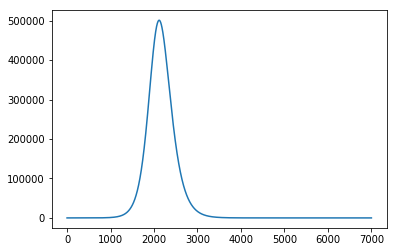

In [11]:
plt.plot(t, I)
plt.show()

In [12]:
for name, series in zip(('S', 'I', 'R'), (S, I, R)):
    results = results.append(pd.Series(series, name=(-1, name)))

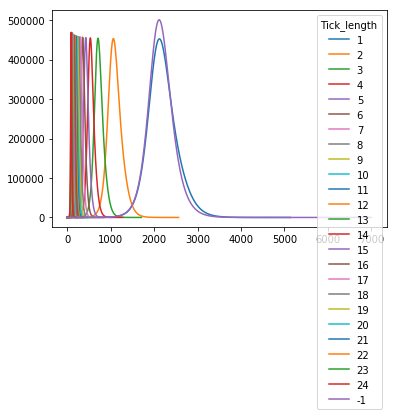

In [13]:
results.xs('I', level='Count_type').T.plot()

In [14]:
np.logical_or?

Call signature:  np.logical_or(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'logical_or'>
File:            /mnt/c/Users/Josh/Google Drive_old/Uni/Part III/project/data/env/lib/python3.4/site-packages/numpy/__init__.py
Docstring:      
logical_or(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Compute the truth value of x1 OR x2 element-wise.

Parameters
----------
x1, x2 : array_like
    Logical OR is applied to the elements of `x1` and `x2`.
    They have to be of the same shape.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at t